In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def histogram_equalization(image, nbr_bins=256):
    # Đảm bảo hình ảnh đầu vào là ảnh xám
    if image.mode != 'L':
        image = image.convert('L')
    
    # Chuyển đổi hình ảnh thành mảng NumPy
    image_array = np.array(image)

    # Tính toán histogram của ảnh
    histogram, bins = np.histogram(image_array, bins=nbr_bins, range=(0, 256), density=True)

    # Tính toán hàm phân phối tích luỹ (CDF - Cumulative Distribution Function)
    cdf = histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]

    # Lấy giá trị mới cho từng pixel dựa trên CDF
    image_equalized = np.interp(image_array, bins[:-1], cdf)

    # Chuyển đổi mảng kết quả thành hình ảnh
    equalized_image = Image.fromarray(image_equalized.astype('uint8'))

    return equalized_image

In [13]:
my_path = 'C:/Users/Luan/ThiGiacMayTinhSo7/img/00304.jpg'
img = Image.open(my_path)

In [15]:
# Áp dụng cân bằng lược đồ ảnh xám
equalized_image = histogram_equalization(img)

In [16]:
# Tạo một lưới 2x2 để hiển thị hình ảnh và biểu đồ
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Hình ảnh gốc')

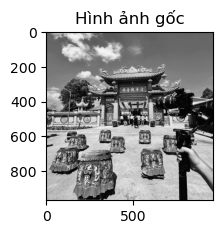

In [17]:
# Hiển thị hình ảnh gốc
plt.subplot(2, 2, 1)
plt.imshow(img.convert("L"), cmap='gray')
plt.title('Hình ảnh gốc')

Text(0.5, 1.0, 'Biểu đồ Histogram - Hình ảnh gốc')

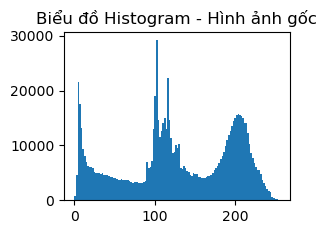

In [18]:
# Vẽ biểu đồ histogram của hình ảnh gốc
plt.subplot(2, 2, 2)
plt.hist(np.array(img.convert("L")).flatten(), bins=128)
plt.title('Biểu đồ Histogram - Hình ảnh gốc')

Text(0.5, 1.0, 'Hình ảnh đã cân bằng')

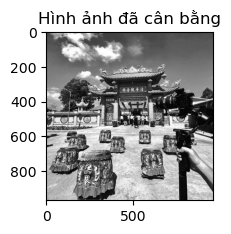

In [19]:
# Hiển thị hình ảnh đã cân bằng
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Hình ảnh đã cân bằng')

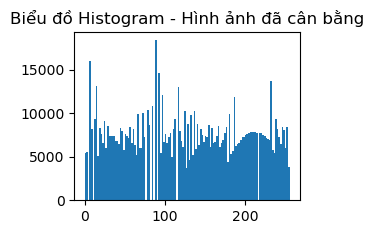

In [24]:
# Vẽ biểu đồ histogram của hình ảnh đã cân bằng
plt.subplot(2, 2, 4)
plt.hist(np.array(equalized_image).flatten(), bins=128)
plt.title('Biểu đồ Histogram - Hình ảnh đã cân bằng')

plt.show()

In [21]:

plt.show()